## Evaluación 1 - Curso Deep Learning

Integrantes:

- Manuel Maldonado
- Nicolás Vasquez
- José Luis Rivas

### Importamos librerías básicas

In [3]:
import tensorflow as tf

from tensorflow import keras

import seaborn as sns

from tensorflow.keras import datasets
import matplotlib.pyplot as plt

### Importamos dataset CIFAR10

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalizar / Escalar datos (TO DO)

## ¿Por qué hacemos esto?

- Reescalamos los datos disminuyendo la resolución de las imágenes para que el entramiento se realice con mejor performance

De esta manera conseguimis los siguientes beneficios:

- Mejoramos la eficiencia del modelo

- Dejamos la escala de las imágenes entre 0 y 1 de manera que los procesadores (GPU/CPU) puedan interpretar la información de forma más eficiente

- Disminuimos el tiempo de gradiente de descenso


In [5]:
# Dividimos los dataset de imágenes en 255
train_images = train_images / 255.0
test_images = test_images / 255.0

In [8]:
# Exploramos la dimensionalidad de los datos
print('Forma de las images de entrenamiento: ' + str(train_images.shape))
print('Cantidad de etiquetas de entrenamiento: ' + str(len(train_labels)))
print('Etiquetas de entrenamiento: ' + str(train_labels))
print('Forma de las imagenes de test: ' + str(test_images.shape))
print('Etiquetas de prueba: ' + str(test_labels))

Forma de las images de entrenamiento: (50000, 32, 32, 3)
Cantidad de etiquetas de entrenamiento: 50000
Etiquetas de entrenamiento: [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
Forma de las imagenes de test: (10000, 32, 32, 3)
Etiquetas de prueba: [[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


# Mirar los datos (Ya está hecho, nada que hacer)

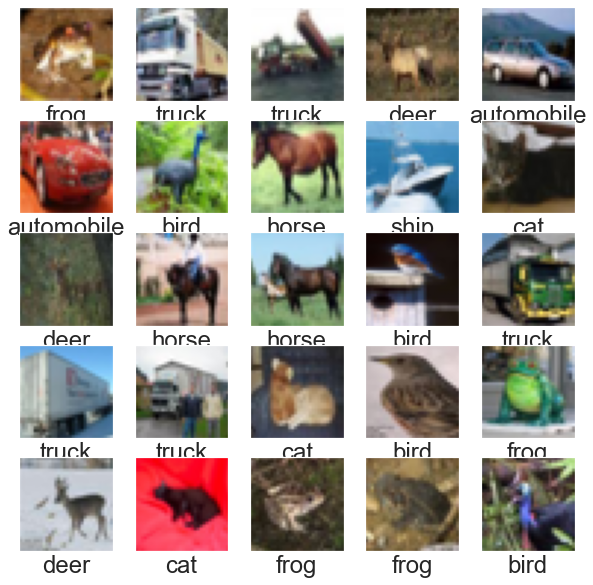

In [27]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Creación de modelos


- Cree un modelo con al menos dos capas ocultas. [Explique cada linea de su modelo]
- Entrene su modelo

- Su modelo debe obtener una accuracy de al menos 41% en test set

- Explique por qué accuracy es buena métrica para este problema, además de un ejemplo de un problema en donde no sea bueno elegir accuracy como métrica.

- Para la red FFNN utilizamos un modelo previamente entrenado llamado EfficientNetB7.
- Estamos intentando resolver un problema de clasificación múltiple. 
- La librería utilizada será keras dentro de Tensorflow. 

- La arquitectura de esta red neuronal consiste en una capa de entrada con un input de (32,32,3), 6 capas ocultas y una capa de salida de 10 clases.

- Para las primeras 5 capas ocultas utilizamos relu, mientras que en la última capa, utilizamos LeakyReLU ya que aborda el problema de ReLU moribundo para los valores negativos.

- Para la cantidad de neuronas, utilizamos potencias de 2 de manera descendiente por capa (desde 512 hasta 32).

In [10]:

input_shape = (32, 32, 3) # Definimos el tamaño del input

base_model = keras.applications.EfficientNetB7( include_top= False ) #Incluimos el modelo sin la ultima capa de clasifcación
base_model.trainable = False # Para que el modelo base no se entrene con los datos que le estamos pasando
inputs = keras.layers.Input( shape= input_shape, name = 'input_layer' ) 
hidden1 = keras.layers.Flatten( input_shape = input_shape) ( inputs )
hidden2 = keras.layers.Dense( 512, activation='relu' ) (hidden1)
hidden3 = keras.layers.Dense( 256, activation='relu' ) (hidden2)
hidden4 = keras.layers.Dense( 128, activation='relu' ) (hidden3)
hidden5 = keras.layers.Dense( 64, activation='relu' ) (hidden4)
hidden6 = keras.layers.Dense( 32, activation='LeakyReLU' ) (hidden5) 
outputs = keras.layers.Dense ( 10, activation='softmax') (hidden6) #Softmax es utilizado para problemas de clasificación multiple

model = keras.Model( inputs, outputs, name='EfficientNetB7_feature_extract' )

model.summary()


Model: "EfficientNetB7_feature_extract"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 

In [11]:
#Compilamos y entrenamos el modelo FFNN
# Utilizamos adam como función de optimización y categorical crossentropy como función de pérdida
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history = model.fit( train_images, train_labels, epochs=50, validation_split=0.1, callbacks=[callback])

Epoch 1/50
1407/1407 [==============================] - 22s 14ms/step - loss: 1.9118 - accuracy: 0.3026 - val_loss: 1.7946 - val_accuracy: 0.3528
Epoch 2/50
1407/1407 [==============================] - 19s 13ms/step - loss: 1.7388 - accuracy: 0.3708 - val_loss: 1.7049 - val_accuracy: 0.3978
Epoch 3/50
1407/1407 [==============================] - 17s 12ms/step - loss: 1.6532 - accuracy: 0.4035 - val_loss: 1.6263 - val_accuracy: 0.4246
Epoch 4/50
1407/1407 [==============================] - 18s 13ms/step - loss: 1.5896 - accuracy: 0.4308 - val_loss: 1.5947 - val_accuracy: 0.4232
Epoch 5/50
1407/1407 [==============================] - 18s 13ms/step - loss: 1.5452 - accuracy: 0.4454 - val_loss: 1.5727 - val_accuracy: 0.4378
Epoch 6/50
1407/1407 [==============================] - 22s 16ms/step - loss: 1.5079 - accuracy: 0.4601 - val_loss: 1.5262 - val_accuracy: 0.4546
Epoch 7/50
1407/1407 [==============================] - 19s 14ms/step - loss: 1.4778 - accuracy: 0.4707 - val_loss: 1.5341 -

Text(0, 0.5, 'Accuracy')

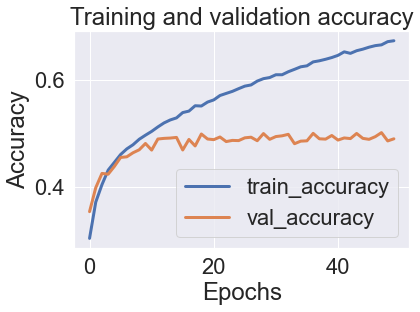

In [12]:
sns.set(font_scale=2)
plt.plot(history.history['accuracy'], lw = 3)
plt.plot(history.history['val_accuracy'], lw = 3)
plt.legend(["train_accuracy", 'val_accuracy'])
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

- Finalmente, con un entrenamiento de 50 epocas, el modelo consiguie una precisión de 67.37 % mientras que la precisión de la validación del 48.96%. 

- Al mirar el gráfico, nos percatamos de que el modelo comienza a overfittear, debido a que a medida que avanzaba el entrenamiento, la red comenzó a aprenderse de memoria los datos.

- ¿Cómo podemos mejorar este modelo? Preprocesando mejor la data, definiendo la mejor función de activación y de pérdida para el problema a resolver.

# Creación de Modelo CNN

- Cree un modelo con al menos dos capas Conv2D [Explique cada linea de su modelo]

- Entrene su modelo

- Su modelo debe obtener una accuracy de al menos 71% en test set

## Arquitectura de nuestra red convolucional

- Esta red consiste en 3 capas de convolución, de 32, 64 y 128 capas, 
- Utilizamos batch normalization para hacer la red más rápida y estable a través de la normalización de las capas de inputs, recentrando y reescalando.- Utilizamos dropout para evitar el overfitting
- Finalmente, aplicamos un output de salida de 10 clases.

In [51]:
# Inicializamos el modelo
modelCNN = keras.Sequential([])
# Añadimos las capas del modelo
modelCNN.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape = (32, 32, 3)))
modelCNN.add(keras.layers.MaxPooling2D( (2,2) ))
modelCNN.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
modelCNN.add(keras.layers.MaxPooling2D( (2,2) ))
modelCNN.add(keras.layers.BatchNormalization())
modelCNN.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
modelCNN.add(keras.layers.MaxPooling2D( (2,2) ))
modelCNN.add(keras.layers.Flatten())
modelCNN.add(keras.layers.BatchNormalization())
modelCNN.add(keras.layers.Dropout(0.25))
modelCNN.add(keras.layers.Dense( 10, activation='softmax' ))
# Vemos el resumen del modelo
modelCNN.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 batch_normalization_21 (Bat  (None, 6, 6, 64)         256       
 chNormalization)                                                
                                                     

In [52]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# Compilamos y entrenamos el modelo
modelCNN.compile(optimizer='adam', #usamos adam porque es el optimizador que mejor se comporta de forma general
              loss='sparse_categorical_crossentropy', #
              metrics=['accuracy'])

historyCNN = modelCNN.fit(train_images, train_labels, epochs=10, validation_split=0.1, callbacks=[callback])

Epoch 1/10
1407/1407 [==============================] - 33s 23ms/step - loss: 1.5130 - accuracy: 0.4769 - val_loss: 1.3773 - val_accuracy: 0.5092
Epoch 2/10
1407/1407 [==============================] - 38s 27ms/step - loss: 1.1279 - accuracy: 0.6051 - val_loss: 1.2187 - val_accuracy: 0.5892
Epoch 3/10
1407/1407 [==============================] - 38s 27ms/step - loss: 0.9894 - accuracy: 0.6541 - val_loss: 1.0914 - val_accuracy: 0.6446
Epoch 4/10
1407/1407 [==============================] - 41s 29ms/step - loss: 0.9032 - accuracy: 0.6841 - val_loss: 0.9376 - val_accuracy: 0.6790
Epoch 5/10
1407/1407 [==============================] - 38s 27ms/step - loss: 0.8495 - accuracy: 0.7048 - val_loss: 1.0341 - val_accuracy: 0.6660
Epoch 6/10
1407/1407 [==============================] - 40s 28ms/step - loss: 0.7952 - accuracy: 0.7223 - val_loss: 0.8514 - val_accuracy: 0.7118
Epoch 7/10
1407/1407 [==============================] - 36s 26ms/step - loss: 0.7595 - accuracy: 0.7361 - val_loss: 0.9225 -

Text(0, 0.5, 'Accuracy')

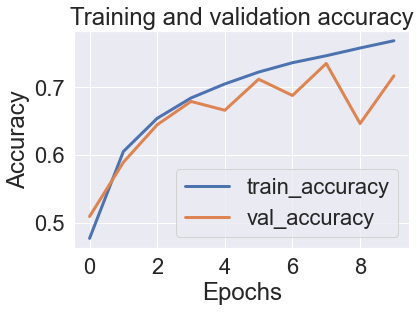

In [53]:
#Miramos visualmente la precisión de entrenamiento vs la de validación
sns.set(font_scale=2)
plt.plot(historyCNN.history['accuracy'], lw = 3)
plt.plot(historyCNN.history['val_accuracy'], lw = 3)
plt.legend(["train_accuracy", 'val_accuracy'])
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

Finalmente después de un entrenamiento de 10 épocas obtuvimos un accuracy del 76.86% y una precisión de validación de 71.68%. Intuímos que de seguir entrenando este modelo, mejoraría aún más su precisión ya que el accuracy de validación se mantiene estable.

# Realice conclusiones a partir de todo lo anterior

Mirando los resultados el ejercicio realizado, las redes convolucionales tienen un mejor accuracy y menos overfit en menos épocas. Esto tambien se debe las capas de batch normalization y dropout, las cuales ayudan a optimizar el entrenamiento del modelo.

Por otra parte, en el modelo Feed Forward Neural Network (FFNN), el problema tuvo peores resultados, principalmente por su estrucura, en donde se realiza una interpretación matricial de los datos, ya que al ser de naturaleza fully connected, los cálculos se complejizan, por lo que el entrenamiento se torna menos óptimo que el de la red convolucional.

### Otro tipos de redes neuronales.

Otro tipo de red neuronal que pudo haberse utilizado son los *transformers*, aunque este tipo de algoritmo es destaca en problemas de resolución de lenguaje natural.

También, otro tipo de red neuronal son las Generatial Adversarial Network (GAN) o red de generación adversarial en español, la cual es utiliza en problemas en donde se concentra un escaso nivel de información, ya que estas redes crean información sintetica que es representativa para la información real.

### En conclusión

El mejor algoritmo para la resolución de este problema son las convolutional neural networks (CNN), ya que su principal función es identificar características y mapearlas. De este modo, si utilizamos información no estructurada, las redes convolucionales pueden inferir información de los datos que captura. 